<a href="https://colab.research.google.com/github/ethammock/Data-Science-Projects/blob/main/la_crime_data_analysis_2020_2023_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Los Angeles Crime Data Analysis

This project aims to analyze Crime Data in the Los Angeles from 2020-2023.

Questions

Which Los Angeles Areas have a higher number of reported crimes?
Most frequent crimes by Area
Number crimes per category in Los Angeles
Number of crimes based on gender
What are the general trends in the reported crimes from 2020-2023
On what days and months are a higher number of crimes reported?



Notebook Content


Step 1: Install + Import Necessary Libraries
Step 2: Reading + Exploring Data
Step 3: Data Cleaning + Preprocessing
Step 4: Data Analysis + Visualization
2020-2023 Crime Data Analysis Final Results

Step 1: Install + Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: Reading + Exploring Data

In [ ]:
data = pd.read_csv ('Crime_Data_from_2020_to_.csv')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155286 entries, 0 to 155285
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           155286 non-null  int64  
 1   Date Rptd       155286 non-null  object 
 2   DATE OCC        155286 non-null  object 
 3   TIME OCC        155286 non-null  int64  
 4   AREA            155286 non-null  int64  
 5   AREA NAME       155286 non-null  object 
 6   Rpt Dist No     155286 non-null  int64  
 7   Part 1-2        155286 non-null  int64  
 8   Crm Cd          155286 non-null  int64  
 9   Crm Cd Desc     155286 non-null  object 
 10  Mocodes         134698 non-null  object 
 11  Vict Age        155286 non-null  int64  
 12  Vict Sex        135568 non-null  object 
 13  Vict Descent    135565 non-null  object 
 14  Premis Cd       155284 non-null  float64
 15  Premis Desc     155238 non-null  object 
 16  Weapon Used Cd  56134 non-null   float64
 17  Weapon Des

In [ ]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.552860e+05,155286.000000,155286.000000,155286.000000,155286.000000,155286.000000,155286.000000,155284.000000,56134.000000,155283.000000,12629.000000,419.000000,14.000000,155285.000000,155285.000000
mean,2.013815e+08,1350.972638,9.554905,1001.338176,1.414912,508.869074,30.141288,295.598130,366.714736,508.576386,952.305012,982.546539,980.500000,33.937834,-117.893487
std,2.553447e+06,649.220694,6.023153,602.078497,0.492708,209.424301,21.756177,213.399541,120.125756,209.191258,119.129184,52.026765,49.353903,2.113049,7.330907
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,626.000000,821.000000,0.000000,-118.667600
25%,2.005049e+08,920.000000,4.000000,497.000000,1.000000,330.000000,13.000000,101.000000,312.000000,330.000000,998.000000,998.000000,998.000000,34.022400,-118.429000
50%,2.009102e+08,1430.000000,9.000000,911.000000,1.000000,480.000000,31.000000,203.000000,400.000000,480.000000,998.000000,998.000000,998.000000,34.059100,-118.316900
75%,2.015111e+08,1900.000000,14.000000,1473.000000,2.000000,626.000000,46.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.148500,-118.271700
max,2.321075e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,998.000000,998.000000,34.329300,0.000000


Cleaning + Preparation

In [ ]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
pd.DataFrame(data.isnull().sum(), columns = ['Missing Values']).rename_axis('Columns')

,Missing Values
Columns,
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0


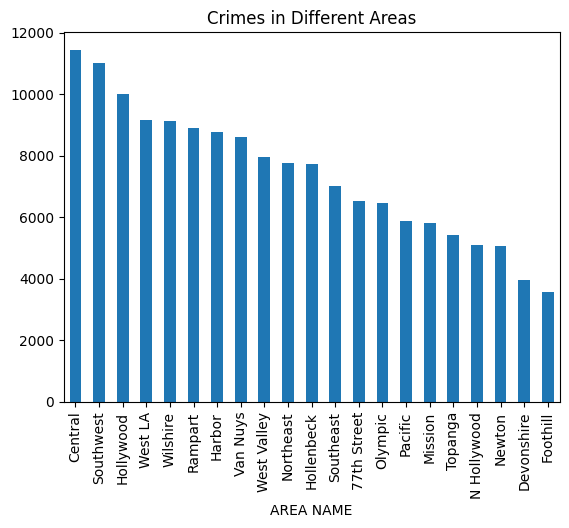

In [ ]:
data['AREA NAME'].value_counts().plot(kind='bar')
plt.title('Crimes in Different Areas')
plt.show()


Analysis shows that the neighbourhoods with highest number of reported crimes in
order in Los Angeles, CA

1. Central
2. Southwest
3. Hollywood
4. West LA
5. Wilshire
6. Rampart
7. Harbor
8. Van Nuys
9. West Valley
10. Northeast
11. Hollenbeack
12. Southeast
13. 7ht Street
14. Olympic
15. Pacific
16. Mission
17. Topanga
18. N Hollywood
19. Newton
20. Devonshire
21. Foothill

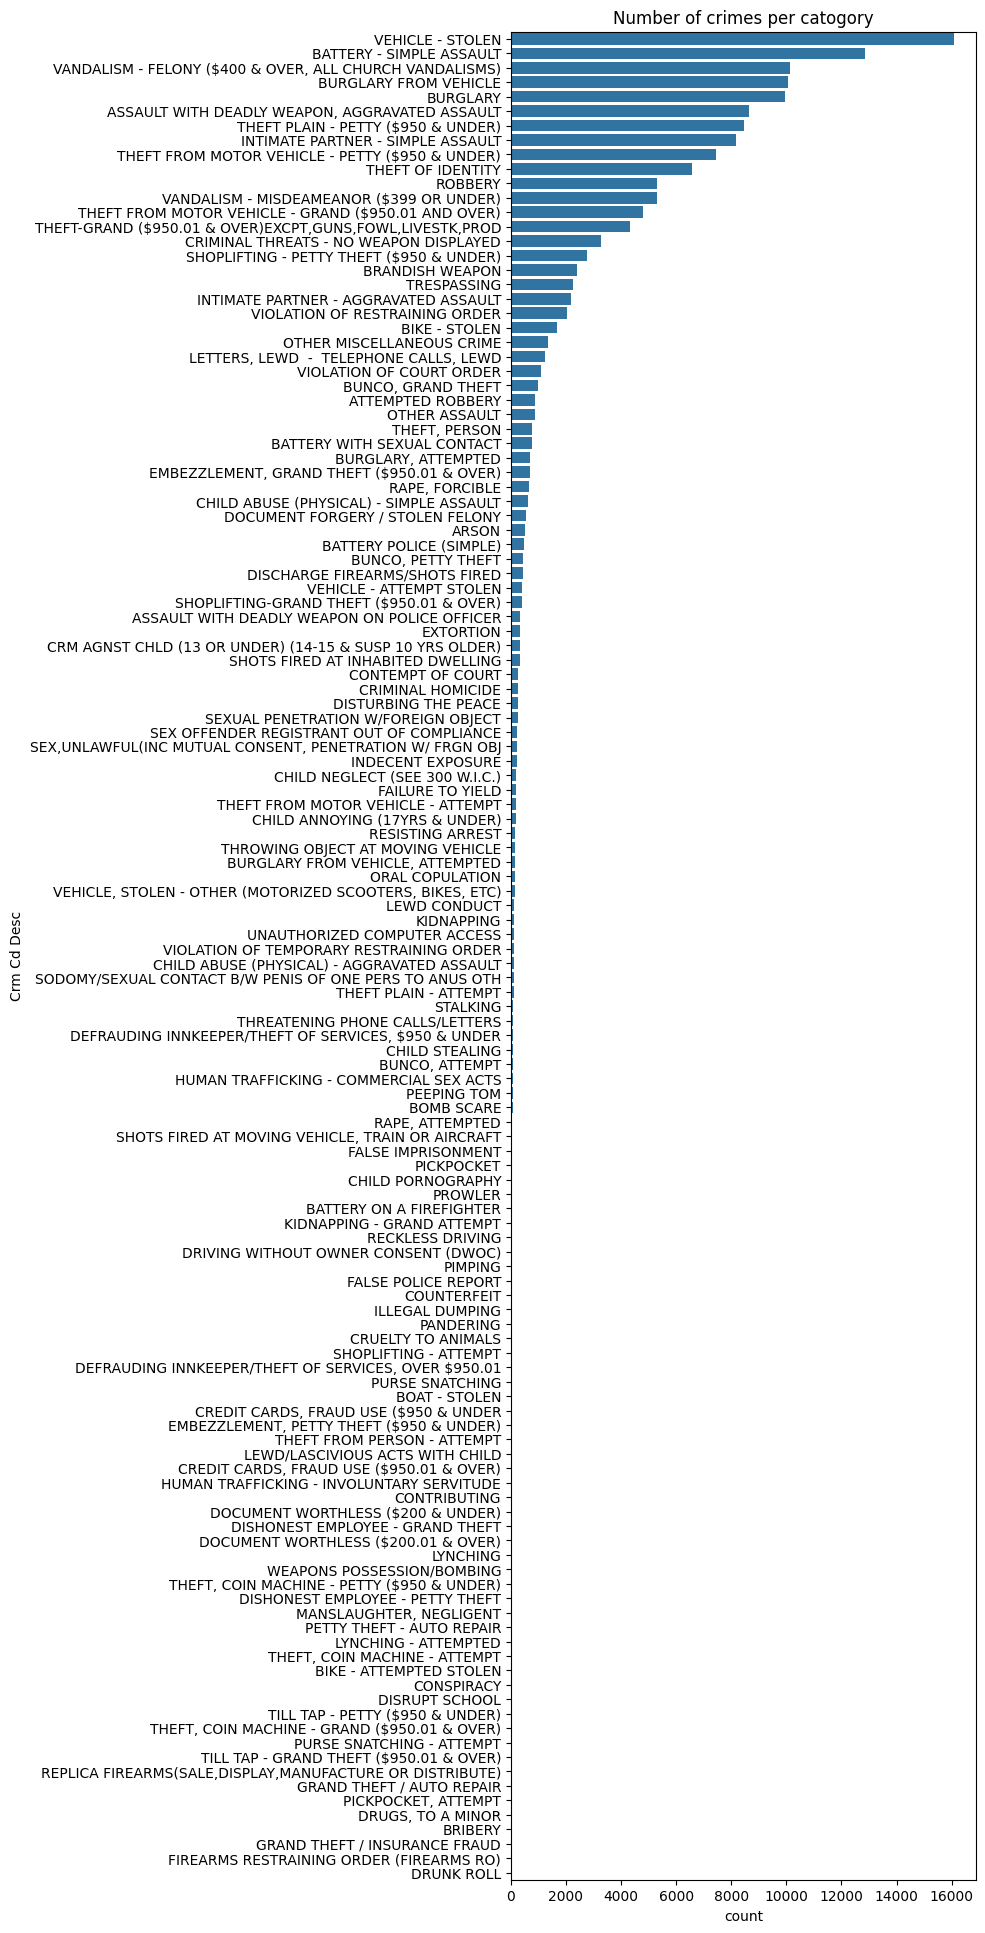

In [ ]:
# create a plot based numbers of crimes based on category

# Plot the countplot
plt.figure(figsize=(6,24))
sns.countplot(y="Crm Cd Desc",data=data,order = data["Crm Cd Desc"].value_counts().index)
plt.title("Number of crimes per catogory")
plt.show()


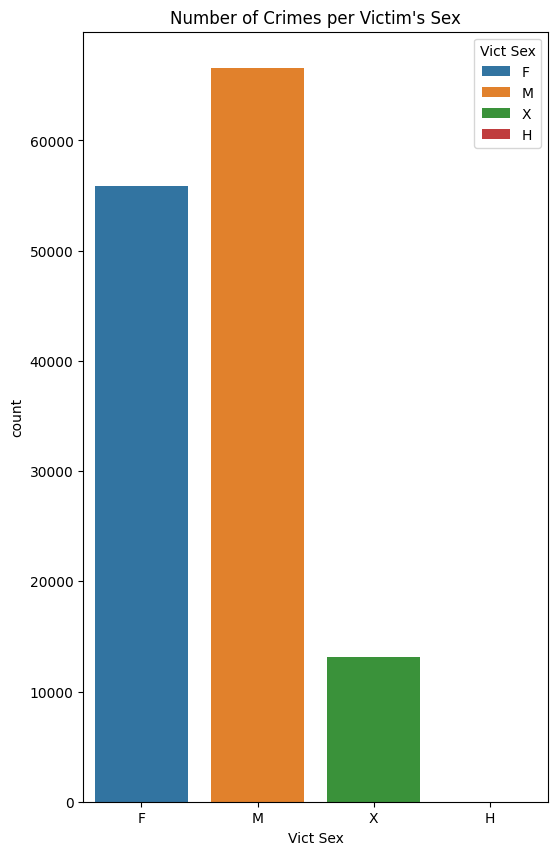

In [ ]:
# Create a color palette based on gender (you can adjust the colors)

plt.figure(figsize=(6, 10))
sns.countplot(x='Vict Sex', data=data, hue='Vict Sex')
plt.title('Number of Crimes per Victim\'s Sex')
plt.show()

<ipython-input-140-6b0b8223b2bd>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Year'] = pd.to_datetime(data['Date Rptd']).dt.year


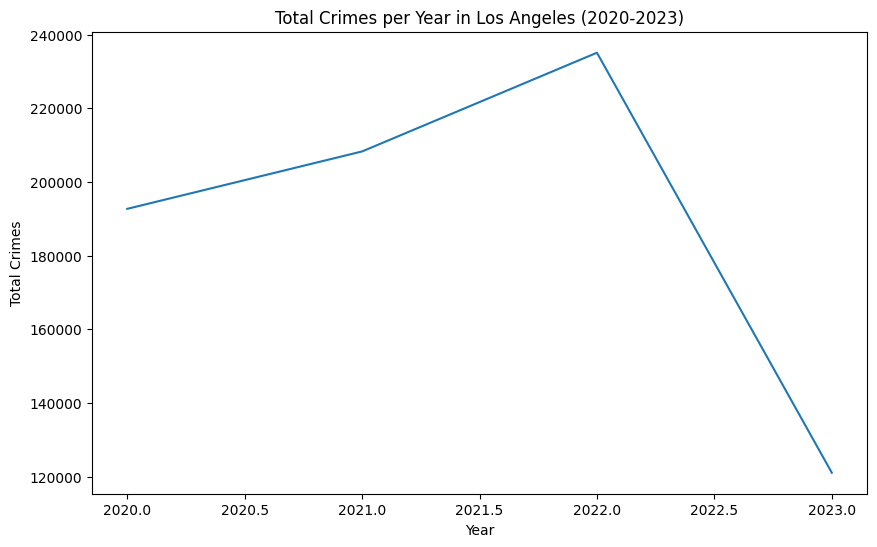

In [ ]:
# calculate a plot for total crime per year

# Create a new column with year only
data['Year'] = pd.to_datetime(data['Date Rptd']).dt.year

# Group data by year and calculate the total number of crimes
grouped_data = data.groupby('Year')['Crm Cd Desc'].count().reset_index(name='Total Crimes')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Crimes', data=grouped_data)
plt.title('Total Crimes per Year in Los Angeles (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()


<ipython-input-99-270035f90563>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Day'] = pd.to_datetime(data['Date Rptd']).dt.day


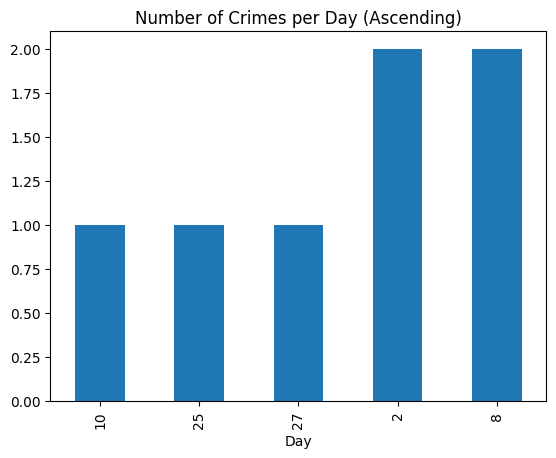

In [ ]:
# prompt: create a chart based on the days of the month crimes are reported in ascending order

data['Day'] = pd.to_datetime(data['Date Rptd']).dt.day
data.groupby('Day')['Number of Crimes'].sum().sort_values(ascending=True).plot(kind='bar')
plt.title('Number of Crimes per Day (Ascending)')
plt.show()
